In [59]:
%matplotlib inline

In [60]:
import pandas as pd
from pathlib import Path

### Pandas makes loading data easy

#### Let's pull down a bit of weather data from Central Park

In [61]:
url = 'https://raw.githubusercontent.com/toddwschneider/nyc-taxi-data/master/data/central_park_weather.csv'

In [62]:
df = pd.read_csv(url, parse_dates=['DATE'])

In [63]:
df.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
0,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-01,0.0,0.0,0.0,26,15,11.2
1,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-02,0.0,0.0,0.0,34,23,6.3
2,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-03,0.0,0.0,0.0,38,29,10.1
3,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-04,0.0,0.0,0.0,42,25,7.6
4,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-05,0.0,0.0,0.0,43,38,6.9


### Grouped aggregations (`GROUP BY` in SQL) are very easy to write

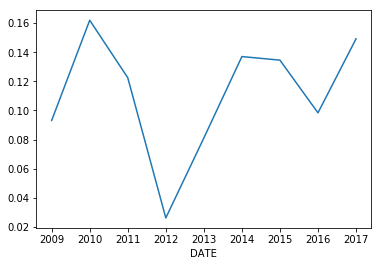

In [64]:
avg_snow = df.groupby(df.DATE.dt.year).SNOW.mean()
avg_snow.plot()

### Average monthly high, low temperature

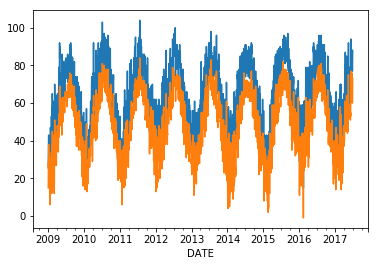

In [71]:
resamp = df.set_index('DATE').resample('D')
ax = resamp.TMAX.mean().plot()
resamp.TMIN.mean().plot(ax=ax)

### How does weather affect cab rides in January 2017?

In [66]:
taxi = pd.read_csv(Path('~') / 'fhv_tripdata_2017-01.csv', parse_dates=['Pickup_date'])

In [67]:
jan_taxi = taxi[taxi.Pickup_date.dt.year.eq(2017) & taxi.Pickup_date.dt.month.eq(1)]

In [84]:
rides_per_day = jan_taxi.rename(columns=dict(Pickup_date='DATE')).set_index('DATE').locationID.resample('D').count()
rides_per_day

DATE
2017-01-01    353102
2017-01-02    234752
2017-01-03    265908
2017-01-04    255243
2017-01-05    284947
2017-01-06    330729
2017-01-07    357719
2017-01-08    328117
2017-01-09    302127
2017-01-10    286346
2017-01-11    292652
2017-01-12    299700
2017-01-13    342313
2017-01-14    397628
2017-01-15    341421
2017-01-16    268986
2017-01-17    332613
2017-01-18    302084
2017-01-19    312135
2017-01-20    357089
2017-01-21    354756
2017-01-22    324030
2017-01-23    337240
2017-01-24    350584
2017-01-25    311571
2017-01-26    331758
2017-01-27    369899
2017-01-28    411441
2017-01-29    335917
2017-01-30    276406
2017-01-31    298153
Freq: D, Name: locationID, dtype: int64

In [86]:
temp = resamp.TMAX.mean().loc['2017-01':'2017-01-31']

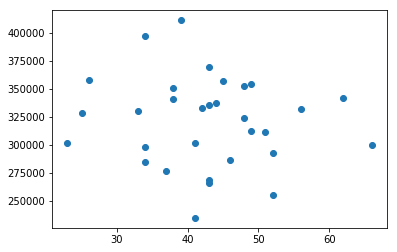

In [89]:
from matplotlib import pyplot as plt
plt.scatter(temp.values, rides_per_day.values)